The king needs our help. He has participated in a RC car competetion, and he has 5 cars to choose from. This is no ordinary RC car race it is a probabilistic one where each car move a random distance based on a set normal distribution(with standard deviation 1 and different means ) at each time step. The king has 5 cars to choose from but he has no idea what distribution do those car hold. He obviously cant test all cars at once(he can only control one car at a time), as he dosent trust anyone with his cars he asks us to find a way to test them and find the best car. 

We can solve this using K-armed bandit problem where at each time step the distance travelled by the car is the reward received and our job is to maximize reward at each time step. 

In [8]:
import pybullet as p
import time
import numpy as np
import pybullet_data 
import matplotlib.pyplot as plt
from collections import Counter

For each of the car we need a distribution by which the car moves

TypeError: plot() got an unexpected keyword argument 'x'

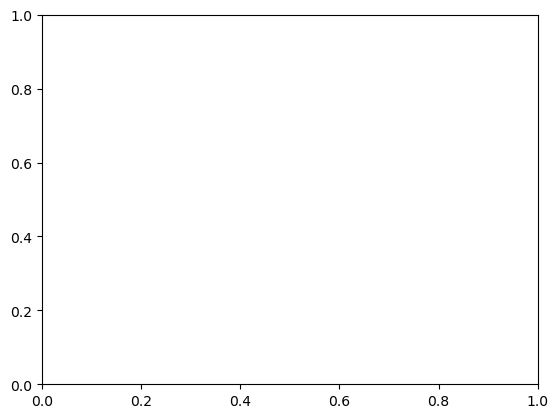

In [15]:
x = []
for i in range(20000):
    x.append( np.random.normal(0 , 1 , 1)[0])

counts=Counter(x)

In [2]:
cars = 5
means = np.random.normal(1 , 0.4 , cars)
means # All have standard deviarion 1

array([1.19499145, 0.88347029, 0.87667482, 0.67979829, 1.20346465])

We will be employing Optimistic initial values and sample avereging technique 

We will be making a 2 distribution to make the problem challenging 

A random force will be put to based on another normal distribution which will be also a normal distribution.

In [17]:
cars = 5
means_force = np.random.normal(5 , 1 , cars)
means_force# All have standard deviarion 1

array([5.57085431, 4.66882818, 6.06868145, 6.28731543, 3.91678496])

In [1]:
Q = [5 , 5 , 5 , 5 , 5]
N = [0 , 0 , 0 , 0 , 0]

In [ ]:
import pybullet as p
import time
import numpy as np
import pybullet_data


physicsClient = p.connect(p.GUI)
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.setGravity(0,0,-10)#or p.DIRECT for non-graphical version p.setAdditionalSearchPath(pybullet_data.getDataPath()) #optionally p.setGravity(0,0,-10)
planeId = p.loadURDF("plane.urdf")
#car1
startPos1 = [0,2,0]
startOrientation1 = p.getQuaternionFromEuler([0,0,0])
racecar0 = p.loadURDF("/racecar/racecar.urdf",startPos1, startOrientation1) #set the center of mass frame (loadURDF sets base link frame) 
p.resetBasePositionAndOrientation(racecar1, startPos1, startOrientation1)

#car2
startPos2 = [0,1,0]
startOrientation2 = p.getQuaternionFromEuler([0,0,0])
racecar1 = p.loadURDF("/racecar/racecar.urdf",startPos2, startOrientation2) #set the center of mass frame (loadURDF sets base link frame) 
p.resetBasePositionAndOrientation(racecar2, startPos2, startOrientation2)


startPos3 = [0,0,0]
startOrientation3 = p.getQuaternionFromEuler([0,0,0])
racecar2 = p.loadURDF("/racecar/racecar.urdf",startPos3, startOrientation3) #set the center of mass frame (loadURDF sets base link frame) 
p.resetBasePositionAndOrientation(racecar3, startPos3, startOrientation3)



startPos4 = [0,-1,0]
startOrientation4 = p.getQuaternionFromEuler([0,0,0])
racecar3 = p.loadURDF("/racecar/racecar.urdf",startPos4, startOrientation4) #set the center of mass frame (loadURDF sets base link frame) 
p.resetBasePositionAndOrientation(racecar4, startPos4, startOrientation4)


startPos5 = [0,-2,0]
startOrientation5 = p.getQuaternionFromEuler([0,0,0])
racecar4 = p.loadURDF("/racecar/racecar.urdf",startPos5, startOrientation5) #set the center of mass frame (loadURDF sets base link frame) 
p.resetBasePositionAndOrientation(racecar5, startPos5, startOrientation5)
targetVel = 10  #rad/s
maxForce = 100  #Newton

numJoints = p.getNumJoints(racecar4)
for joint in range(numJoints):
  print(p.getJointInfo(racecar4, joint))

p.setRealTimeSimulation(0)



for i in range(10000):
    if i < 5 :# We first explore all the possible options at least once 
        if i==0:
            reward_0 = np.random.normal(means[0] , 1 , 1)[0] #get reward from car 0
            Q[0] = Q[0] + reward_0
            N[0]+=1

        elif i==1:
            reward_1 = np.random.normal(means[1] , 1 , 1)[0]
            Q[1] = Q[1] + reward_1#get reward from car 1
            N[1]+=1

        elif i==2:
            reward_2 = np.random.normal(means[2] , 1 , 1)[0]
            Q[2] = Q[2] + reward_2#get reward from car 2
            N[2]+=1

        elif i==3:
            reward_3 = np.random.normal(means[3] , 1 , 1)[0]
            Q[3] = Q[3] + reward_3#get reward from car 3
            N[3]+=1

        elif i==4:
            reward_4 = np.random.normal(means[4] , 1 , 1)[0]#get reward from car 4
            Q[4] = Q[4] + reward_4
            N[4]+=1

    else:
        #Now we need to choose the best each time 
        
    for joint in [2,3,5,7]:
        gemPos, gemOrn = p.getBasePositionAndOrientation(racecar5)
        
        p.setJointMotorControl2(racecar5, joint, p.VELOCITY_CONTROL,targetVelocity =  3, force = 50)
        p.applyExternalForce(racecar5,joint , [10,10,0] , gemPos , p.WORLD_FRAME)
    p.stepSimulation()
# for step in range(4000):
#     p.stepSimulation()


# # for i in range (10000):
    
    
# # cubePos, cubeOrn = p.getBasePositionAndOrientation(boxId) 
# print(cubePos,cubeOrn)
p.disconnect()

pybullet build time: Dec 17 2023 23:51:54


(0, b'base_link_joint', 4, -1, -1, 0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'chassis', (0.0, 0.0, 0.0), (0.0, 0.0, 0.05), (0.0, 0.0, 0.0, 1.0), -1)
(1, b'chassis_inertia_joint', 4, -1, -1, 0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, b'chassis_inertia', (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0, 1.0), 0)
(2, b'left_rear_wheel_joint', 0, 7, 6, 1, 0.0, 0.0, 0.0, -1.0, 10.0, 100.0, b'left_rear_wheel', (0.0, 0.0, -1.0), (0.0, 0.1, 0.0), (-0.7071080798594737, 0.0, 0.0, 0.7071054825112363), 0)
(3, b'right_rear_wheel_joint', 0, 8, 7, 1, 0.0, 0.0, 0.0, -1.0, 10.0, 100.0, b'right_rear_wheel', (0.0, 0.0, -1.0), (0.0, -0.1, 0.0), (-0.7071080798594737, 0.0, 0.0, 0.7071054825112363), 0)
(4, b'left_steering_hinge_joint', 0, 9, 8, 1, 0.0, 0.0, -1.0, 1.0, 10.0, 100.0, b'left_steering_hinge', (-1.0, 0.0, 0.0), (0.325, 0.1, 0.0), (0.0, -0.7071080798594737, 0.0, 0.7071054825112363), 0)
(5, b'left_front_wheel_joint', 0, 10, 9, 1, 0.0, 0.0, 0.0, -1.0, 10.0, 100.0, b'left_front_wheel', (0.0, 0.0, -1.0), (0.0, 0.0, 0.